In [1]:
# пример работы случайного леса

In [2]:
# импорт
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
# получение данных 
# (так как они копируют получение данных в 2, то загрузим сохраненный обработанный датасет)
df_rename = pd.read_csv('../data/gdelt_counts_event_by_day_clear.csv', index_col='date', parse_dates=['date']);

In [4]:
df_rename

MAKE PUBLIC STATEMENT   APPEAL  EXPRESS INTENT TO COOPERATE  \
date                                                                      
2019-01-01                11723.0   6142.0                       5348.0   
2019-01-02                17471.0   9285.0                       8509.0   
2019-01-03                21050.0  10438.0                      10658.0   
2019-01-04                20850.0  10612.0                      10245.0   
2019-01-05                13955.0   6834.0                       6409.0   
2019-01-06                11880.0   6193.0                       5911.0   
2019-01-07                19766.0  10068.0                       9689.0   
2019-01-08                24363.0  12079.0                      12343.0   
2019-01-09                26014.0  13082.0                      13444.0   
2019-01-10                24943.0  12897.0                      13480.0   
2019-01-11                24529.0  12061.0                      12562.0   
2019-01-12                16189.0   7883.0                       7519.0   
2019-01-13                14061.0   7003.0                       6729.0   
2019-01-14                22013.0  11398.0                      11879.0   
2019-01-15                26468.0  13552.0                      12857.0   
2019-01-16                27274.0  14278.0                      13861.0   
2019-01-17                27131.0  13510.0                      13395.0   
2019-01-18                25752.0  12730.0                      13315.0   
2019-01-19                17069.0   8711.0                       8246.0   
2019-01-20                13733.0   7343.0                       6315.0   
2019-01-21                20679.0  10574.0                      10674.0   
2019-01-22                24780.0  12808.0                      12307.0   
2019-01-23                26855.0  13578.0                      13503.0   
2019-01-24                27193.0  13911.0                      13548.0   
2019-01-25                25194.0  13301.0                      12452.0   
2019-01-26                16241.0   8290.0                       7204.0   
2019-01-27                14118.0   7038.0                       6261.0   
2019-01-28                22571.0  11984.0                      11111.0   
2019-01-29                27457.0  14299.0                      13611.0   
2019-01-30                27923.0  14607.0                      13980.0   
...                           ...      ...                          ...   
2019-12-02                19015.0  10057.0                      10244.0   
2019-12-03                23382.0  11982.0                      12537.0   
2019-12-04                24784.0  12771.0                      12336.0   
2019-12-05                23804.0  12268.0                      11865.0   
2019-12-06                22321.0  11245.0                      10755.0   
2019-12-07                14219.0   7064.0                       6214.0   
2019-12-08                12169.0   6146.0                       5511.0   
2019-12-09                20249.0  10770.0                      10373.0   
2019-12-10                24138.0  13071.0                      12945.0   
2019-12-11                24221.0  12554.0                      11173.0   
2019-12-12                23315.0  12532.0                      11343.0   
2019-12-13                22464.0  11671.0                      11204.0   
2019-12-14                13255.0   6988.0                       6035.0   
2019-12-15                11644.0   5946.0                       5198.0   
2019-12-16                18732.0  10042.0                       9356.0   
2019-12-17                22278.0  11997.0                      10382.0   
2019-12-18                22853.0  11972.0                      10369.0   
2019-12-19                22011.0  11948.0                      10430.0   
2019-12-20                21205.0  11337.0                      10156.0   
2019-12-21                13388.0   7006.0                       6075.0   
2019-12-22                10959.0   5

In [5]:
# выбираем один из сильно коррелирующих параметров
labels = np.array(df_rename['MAKE PUBLIC STATEMENT'])
# удаляем его из выборки
features = df_rename.drop('MAKE PUBLIC STATEMENT', axis = 1)

feature_list = list(features.columns)

In [6]:
# разбиваем на обучающую и тестовую выборку
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [7]:
# учим модель
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
# оцениваем ошибки
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

print('Среднее значение параметра реального:', round(np.mean(test_labels), 2))
print('Среднее значение параметра предсказанного:', round(np.mean(predictions), 2))
print('Средний размер ошибки:', round(np.mean(errors), 2))
print('Средний размер ошибки(в процентах):', round(np.mean(np.mean(100 * (errors / test_labels))), 2))

Среднее значение параметра реального: 21324.25
Среднее значение параметра предсказанного: 21496.82
Средний размер ошибки: 464.44
Средний размер ошибки(в процентах): 2.28


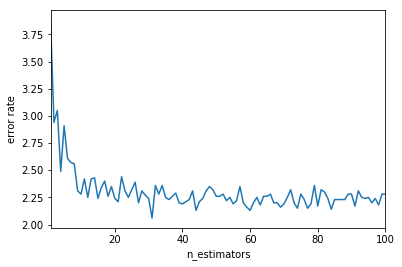

In [9]:
# проверим насколько уменьшается процент ошибки на тестовой выборке с увеличением числа деревьев

min_estimators = 1
max_estimators = 100

i_plot = []
error_plot = []

for i in range(min_estimators, max_estimators + 1):
    #print(i)

    rf = RandomForestRegressor(n_estimators = i)
    rf.fit(train_features, train_labels)
    
    predictions = rf.predict(test_features)
    errors = abs(predictions - test_labels)
    
    i_plot.append(i)
    error_plot.append(round(np.mean(np.mean(100 * (errors / test_labels))), 2))

plt.plot(i_plot, error_plot)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.show()

In [10]:
# в целом модель уже на 10-20 деревьях сходиться к примерно 2.4% ошибок на тестовой выборке
# из чего следует что дальнейшее увеличение числа деревьев не имеет значительного смысла